In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math
import pandas as pd
from numpy import genfromtxt

In [2]:
def cleanData(t,dup,col1):
    
    #get rid of duplicates
    cols = np.array([])
    for i in range(len(dup)):
        if (dup[i] == True):
            cols = np.append(cols,i)     
    #t.mask(dup == True)
    
    imask = 0
    for i in range(len(col1)):
        first_match = col1[i]
        for j in range(i+1,len(col1)):
            if (first_match == col1[j]):
                cols = np.append(cols,j)
            else: break
    cols = np.unique(cols)
    cols = cols.astype(int)
    t.drop(t.index[cols])
    
    print('removed',len(cols),'rows')
        
    return t

In [3]:
def AbsoluteMagnitudes(plx,Bmag,Vmag,Gmag,Jmag,Hmag,Kmag,umag,gmag,rmag,imag,zmag):
    #Calculate distance, and absolute magnitudes
    
    Dist = np.array([])
    Bmags = np.array([])
    Vmags = np.array([])
    Gmags = np.array([])
    Jmags = np.array([])
    Hmags = np.array([])
    Kmags = np.array([])
    umags = np.array([])
    gmags = np.array([])
    rmags = np.array([])
    imags = np.array([])
    zmags = np.array([])

    Dist = 1000./plx
    Bmags = Bmag - 5 * np.log10(Dist) + 5
    Vmags = Vmag - 5 * np.log10(Dist) + 5
    Gmags = Gmag - 5 * np.log10(Dist) + 5
    Jmags = Jmag - 5 * np.log10(Dist) + 5
    Hmags = Hmag - 5 * np.log10(Dist) + 5
    Kmags = Kmag - 5 * np.log10(Dist) + 5
    umags = umag - 5 * np.log10(Dist) + 5
    gmags = gmag - 5 * np.log10(Dist) + 5
    rmags = rmag - 5 * np.log10(Dist) + 5
    imags = imag - 5 * np.log10(Dist) + 5
    zmags = zmag - 5 * np.log10(Dist) + 5
    
    return Dist, Bmags, Vmags, Gmags,Jmags,Hmags,Kmags, umags, gmags, rmags, imags, zmags

In [16]:
def ColorClassification(Gmags,Kmags,colors):    
    #split the stars into different categories based on G-K
    
    G_K = Gmags-Kmags
    color = np.ones(len(G_K))*1000
    for i in range(len(colors)):
        for j in range(len(G_K)):
            if (i == 0):
                if (G_K[j] <= colors[i]):
                    color[j] = colors[i]
            elif(G_K[j] <= colors[i] and G_K[j] > colors[i-1]):
                color[j] = colors[i]
    return color

#and main_type[i] == 'Star'

In [5]:
def CreateTemplates(color,colors,Bmags, Vmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags):
    #for each color class, a template is created of the absolute magnitudes of the stars and their color indices
    
    G_K = Gmags-Kmags
    avg_colors = np.array([])
    err_colors = np.array([])
    stars = np.array([])
    for c in colors:
        #create array of values for color indices and absolute magnitudes
        G_B_array = np.array([])
        G_V_array = np.array([])
        G_J_array = np.array([])
        G_H_array = np.array([])
        G_K_array = np.array([])
        G_u_array = np.array([])
        G_g_array = np.array([])
        G_r_array = np.array([])
        G_i_array = np.array([])
        G_z_array = np.array([])
        B = np.array([])
        V = np.array([])
        G = np.array([])
        J = np.array([])
        H = np.array([])
        K = np.array([])
        u = np.array([])
        g = np.array([])
        r = np.array([])
        i_m = np.array([])
        z = np.array([])
        star_count = 0
        #fill arrays with values if the values are part of the color category
        for i in range(len(Bmags)):
            if (color[i] == c):
                G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
                G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
                G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
                G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
                G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
                G_u_array = np.append(G_u_array,Gmags[i]-umags[i])
                G_g_array = np.append(G_g_array,Gmags[i]-gmags[i])
                G_r_array = np.append(G_r_array,Gmags[i]-rmags[i])
                G_i_array = np.append(G_i_array,Gmags[i]-umags[i])
                G_z_array = np.append(G_z_array,Gmags[i]-zmags[i])
                B = np.append(B,Bmags[i])
                V = np.append(V,Vmags[i])
                G = np.append(G,Gmags[i])
                J = np.append(J,Jmags[i])
                H = np.append(H,Hmags[i])
                K = np.append(K,Kmags[i])
                u = np.append(u,umags[i])
                g = np.append(g,umags[i])
                r = np.append(r,rmags[i])
                i_m = np.append(i_m,imags[i])
                z = np.append(z,zmags[i])
                star_count = star_count +1
        #average G-K value (i dont think this is necessary)
        avg_colors = np.append(avg_colors,np.mean(G_K_array))
        err_colors = np.append(err_colors,np.std(G_K_array))
        #number of stars per color
        stars = np.append(stars,star_count)
        #relative SED
        mag_array = [np.nanmean(G_u_array),np.nanmean(G_B_array), np.nanmean(G_g_array),\
                     np.nanmean(G_V_array),np.nanmean(G_i_array), np.nanmean(G_r_array), \
                     np.nanmean(G_z_array),np.nanmean(G_J_array), np.nanmean(G_H_array), 
                     np.nanmean(G_K_array)]
        std_array = [np.nanstd(G_u_array),np.nanstd(G_B_array), np.nanstd(G_g_array),\
                     np.nanstd(G_V_array),np.nanstd(G_i_array), np.nanstd(G_r_array), \
                     np.nanstd(G_z_array),np.nanstd(G_J_array), np.nanstd(G_H_array), 
                     np.nanstd(G_K_array)]
        #absolute SED
        mag_array2 = [np.nanmean(u), np.nanmean(B), np.nanmean(g), \
                      np.nanmean(V), np.nanmean(i_m), np.nanmean(G), \
                      np.nanmean(r), np.nanmean(z), np.nanmean(J), \
                      np.nanmean(H), np.nanmean(K)]
        std_array2 = [np.nanstd(u), np.nanstd(B), np.nanstd(g), \
                      np.nanstd(V), np.nanstd(i_m), np.nanstd(G), \
                      np.nanstd(r), np.nanstd(z), np.nanstd(J), \
                      np.nanstd(H), np.nanstd(K)]
        #add standard deviation error
        
        val = np.sqrt(len(G_B_array))
        std_array3 = std_array/val
        val2 = np.sqrt(len(B))
        std_array4 = std_array2/val2
        
        #stack SEDs
        if (c == colors[0]):
            color_mags = np.array(mag_array)
            color_std = np.array(std_array)
            color_std_err = np.array(std_array3)
            abs_color_mags = np.array(mag_array2)
            abs_color_std = np.array(std_array2)
            abs_color_std_err = np.array(std_array4)
        else:
            color_mags = np.vstack((color_mags,mag_array))
            color_std = np.vstack((color_std,std_array))
            color_std_err = np.vstack((color_std_err,std_array3))
            abs_color_mags = np.vstack((abs_color_mags, mag_array2))
            abs_color_std = np.vstack((abs_color_mags, std_array2))
            abs_color_std_err = np.vstack((abs_color_std_err,std_array4))
    return stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err

In [57]:
def CreateTemplates2(color,colors,Bmags, Vmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags):
    #for each color class, a template is created of the absolute magnitudes of the stars and their color indices
    
    G_K = Gmags-Kmags
    avg_colors = np.array([])
    err_colors = np.array([])
    stars = np.array([])
    for c in colors:
        #create array of values for color indices and absolute magnitudes
        G_B_array = np.array([])
        G_V_array = np.array([])
        G_J_array = np.array([])
        G_H_array = np.array([])
        G_K_array = np.array([])
        G_u_array = np.array([])
        G_g_array = np.array([])
        G_r_array = np.array([])
        G_i_array = np.array([])
        G_z_array = np.array([])
        B = np.array([])
        V = np.array([])
        G = np.array([])
        J = np.array([])
        H = np.array([])
        K = np.array([])
        u = np.array([])
        g = np.array([])
        r = np.array([])
        i_m = np.array([])
        z = np.array([])
        star_count = 0
        #fill arrays with values if the values are part of the color category
        for i in range(len(Bmags)):
            if (color[i] == c):
                G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
                G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
                G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
                G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
                G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
                G_u_array = np.append(G_u_array,Gmags[i]-umags[i])
                G_g_array = np.append(G_g_array,Gmags[i]-gmags[i])
                G_r_array = np.append(G_r_array,Gmags[i]-rmags[i])
                G_i_array = np.append(G_i_array,Gmags[i]-umags[i])
                G_z_array = np.append(G_z_array,Gmags[i]-zmags[i])
                B = np.append(B,Bmags[i])
                V = np.append(V,Vmags[i])
                G = np.append(G,Gmags[i])
                J = np.append(J,Jmags[i])
                H = np.append(H,Hmags[i])
                K = np.append(K,Kmags[i])
                u = np.append(u,umags[i])
                g = np.append(g,umags[i])
                r = np.append(r,rmags[i])
                i_m = np.append(i_m,imags[i])
                z = np.append(z,zmags[i])
                star_count = star_count +1
        #average G-K value (i dont think this is necessary)
        avg_colors = np.append(avg_colors,np.mean(G_K_array))
        err_colors = np.append(err_colors,np.std(G_K_array))
        #number of stars per color
        stars = np.append(stars,star_count)
        #relative SED
        mag_array = [np.mean(G_u_array),np.mean(G_B_array), np.mean(G_g_array),\
                     np.mean(G_V_array),np.mean(G_i_array), np.mean(G_r_array), \
                     np.mean(G_z_array),np.mean(G_J_array), np.mean(G_H_array), 
                     np.mean(G_K_array)]
        std_array = [np.std(G_u_array),np.std(G_B_array), np.std(G_g_array),\
                     np.std(G_V_array),np.std(G_i_array), np.std(G_r_array), \
                     np.std(G_z_array),np.std(G_J_array), np.std(G_H_array), 
                     np.std(G_K_array)]
        #absolute SED
        mag_array2 = [np.mean(u), np.mean(B), np.mean(g), \
                      np.mean(V), np.mean(i_m), np.mean(G), \
                      np.mean(r), np.mean(z), np.mean(J), \
                      np.mean(H), np.mean(K)]
        std_array2 = [np.std(u), np.std(B), np.std(g), \
                      np.std(V), np.std(i_m), np.std(G), \
                      np.std(r), np.std(z), np.std(J), \
                      np.std(H), np.std(K)]
        #add standard deviation error
        
        val = np.sqrt(len(G_B_array))
        std_array3 = std_array/val
        val2 = np.sqrt(len(B))
        std_array4 = std_array2/val2
        
        #stack SEDs
        if (c == colors[0]):
            color_mags = np.array(mag_array)
            color_std = np.array(std_array)
            color_std_err = np.array(std_array3)
            abs_color_mags = np.array(mag_array2)
            abs_color_std = np.array(std_array2)
            abs_color_std_err = np.array(std_array4)
        else:
            color_mags = np.vstack((color_mags,mag_array))
            color_std = np.vstack((color_std,std_array))
            color_std_err = np.vstack((color_std_err,std_array3))
            abs_color_mags = np.vstack((abs_color_mags, mag_array2))
            abs_color_std = np.vstack((abs_color_mags, std_array2))
            abs_color_std_err = np.vstack((abs_color_std_err,std_array4))
    return stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err

In [6]:
def PrintToFile(colors,stars,color_mags,color_std,color_std_err,name):
    
    rows = len(colors)
    colors2 = np.zeros([rows,1])
    stars2 = np.zeros([rows,1])
    for i in range(rows):
        colors2[i,0] = colors[i]
        stars2[i,0] = stars[i]
    
    arrays=[stars2,color_mags,color_std,color_std_err]

    # Create an array to return to
    FinalTemplate = colors2

    for array in arrays:
        FinalTemplate = np.concatenate([FinalTemplate, array],axis = 1)
        
    columns = 'color,number_of_stars,G_B,G_V,G_J,G_H,G_K,G_B_std,G_V_std,G_J_std,G_H_std,G_K_std,' + \
            'G_B_std_err,G_V_std_err,G_J_std_err,G_H_std_err,G_K_std_err'
        
    np.savetxt(name, FinalTemplate, delimiter=",",header = columns)
    
    return FinalTemplate

# Read in Data

In [7]:
t = pd.read_csv('../Gaia_plx7_dr2.csv')

print("\nThe number of stars is " + str(len(t)))

Bmag = t["phot_bp_mean_mag"].values
Vmag = t["phot_rp_mean_mag"].values
Gmag = t["phot_g_mean_mag"].values
Jmag = t["j_m"].values
Hmag = t["h_m"].values
Kmag = t["ks_m"].values
umag = t["u_mag"].values
gmag = t["g_mag"].values
rmag = t["r_mag"].values
imag = t["i_mag"].values
zmag = t["z_mag"].values
plx = t['parallax'].values

t.columns.values.tolist()

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (96,122,130) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



The number of stars is 2092886


['Unnamed: 0',
 'solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'astrometric_weight_al',
 'astrometric_pseudo_colour',
 'astrometric_pseudo_colour_error',
 'mean_varpi_factor_al',
 'astrometric_matched_observations',
 'visibility_periods_used',
 'astrometric_sigma5d_max',
 'frame_rotator_object_type',
 'matched_observations',
 'duplicated_source'

In [8]:
Dist,Vmags,Bmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags = \
AbsoluteMagnitudes(plx,Vmag,Bmag,Gmag,Jmag,Hmag,Kmag,umag,gmag,rmag,imag,zmag)

# Plots of Data

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


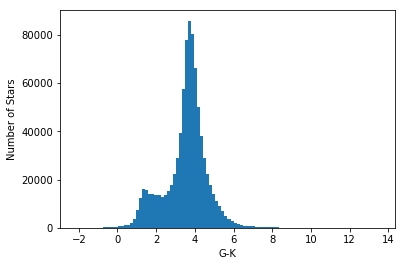

In [10]:
#calculate G-K
G_K = Gmags - Kmags
plt.hist(G_K,range = [min(G_K),max(G_K)],bins = 100)
plt.xlabel('G-K')
plt.ylabel('Number of Stars')
plt.show()

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


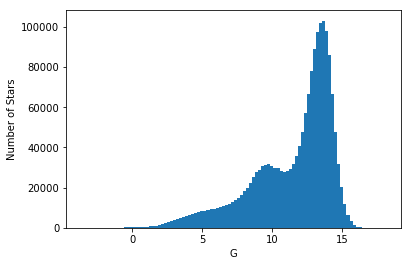

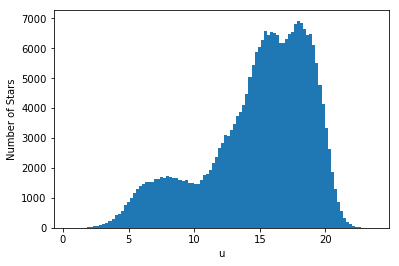

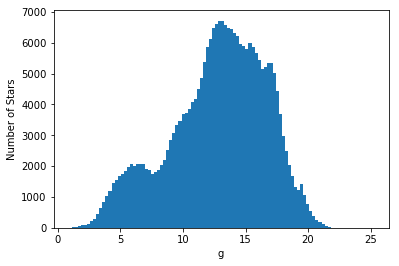

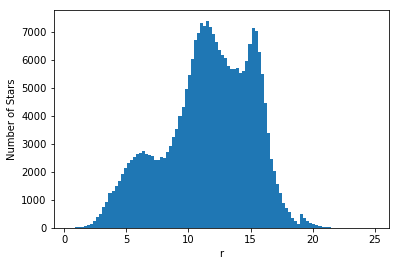

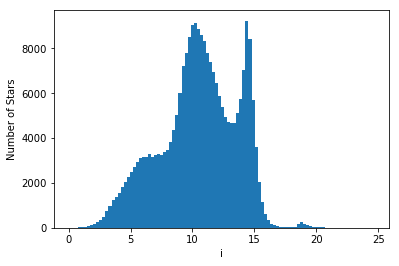

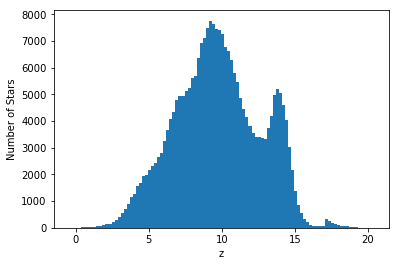

In [23]:
#histograms of each band

plt.hist(Gmags,range = [min(Gmags),max(Gmags)],bins = 100)
plt.xlabel('G')
plt.ylabel('Number of Stars')
plt.show()

plt.hist(umags,range = [min(umags),max(umags)],bins = 100)
plt.xlabel('u')
plt.ylabel('Number of Stars')
plt.show()

plt.hist(gmags,range = [min(gmags),max(gmags)],bins = 100)
plt.xlabel('g')
plt.ylabel('Number of Stars')
plt.show()

plt.hist(rmags,range = [min(rmags),max(rmags)],bins = 100)
plt.xlabel('r')
plt.ylabel('Number of Stars')
plt.show()

plt.hist(imags,range = [min(imags),max(imags)],bins = 100)
plt.xlabel('i')
plt.ylabel('Number of Stars')
plt.show()

plt.hist(zmags,range = [min(zmags),max(zmags)],bins = 100)
plt.xlabel('z')
plt.ylabel('Number of Stars')
plt.show()

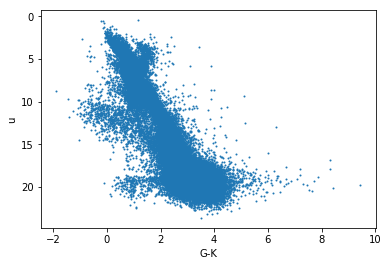

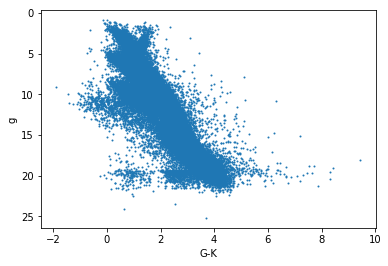

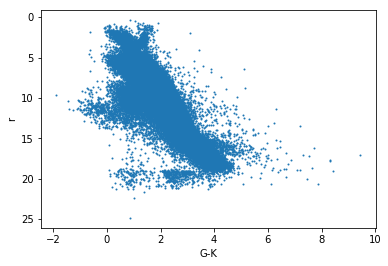

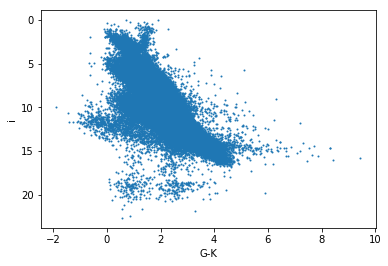

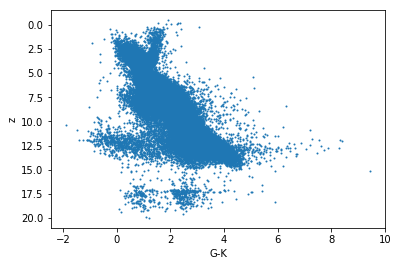

In [52]:
#Scatter Plots of Relation between data points

plt.scatter(G_K,umags,s=1)
plt.gca().invert_yaxis()
plt.ylabel('u')
plt.xlabel('G-K')
plt.show()

plt.scatter(G_K,gmags,s=1)
plt.gca().invert_yaxis()
plt.ylabel('g')
plt.xlabel('G-K')
plt.show()

plt.scatter(G_K,rmags,s=1)
plt.gca().invert_yaxis()
plt.ylabel('r')
plt.xlabel('G-K')
plt.show()

plt.scatter(G_K,imags,s=1)
plt.gca().invert_yaxis()
plt.ylabel('i')
plt.xlabel('G-K')
plt.show()

plt.scatter(G_K,zmags,s=1)
plt.gca().invert_yaxis()
plt.ylabel('z')
plt.xlabel('G-K')
plt.show()

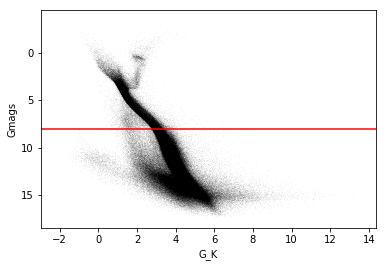

In [51]:
#Gabs vs G_k

plt.scatter(G_K,Gmags,s=.01,alpha=0.1,color="black")
plt.axhline(y = 8,c='r')
plt.gca().invert_yaxis()
plt.xlabel('G_K')
plt.ylabel('Gmags')
plt.show()

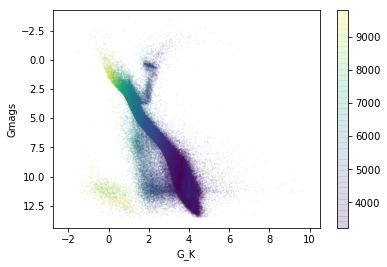

In [48]:
plt.scatter(G_K,Gmags,s=.1,alpha=.1,c=Temp)
plt.gca().invert_yaxis()
plt.xlabel('G_K')
plt.ylabel('Gmags')
plt.colorbar()
plt.show()

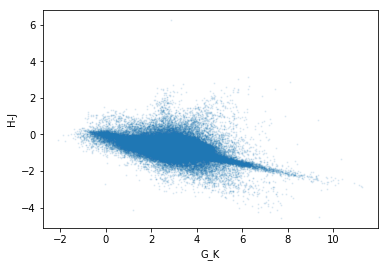

In [57]:
H_J = Hmags-Jmags
plt.scatter(G_K,H_J,s=1,alpha=0.1)
plt.xlabel('G_K')
plt.ylabel('H-J')
plt.show()

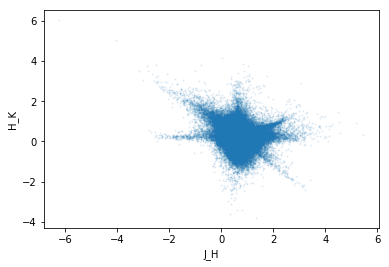

In [59]:
J_H = Jmags-Hmags
H_K = Hmags-Kmags
plt.scatter(J_H,H_K,s=1,alpha=0.1)
plt.xlabel('J_H')
plt.ylabel('H_K')
plt.show()

In [ ]:
H_J = Hmags-Jmags
plt.scatter(G_K,H_J,s=1,alpha=0.1)
plt.xlabel('G_K')
plt.ylabel('H-J')
plt.show()

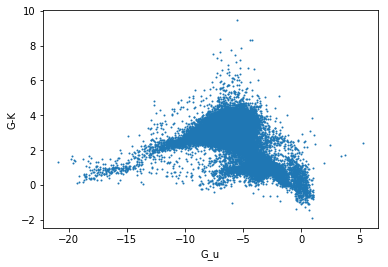

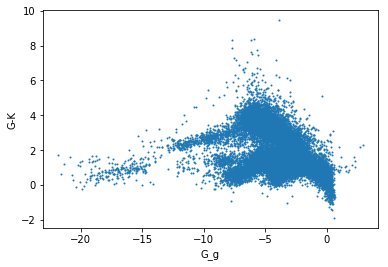

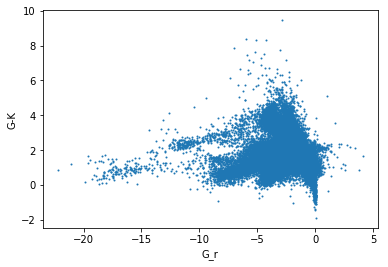

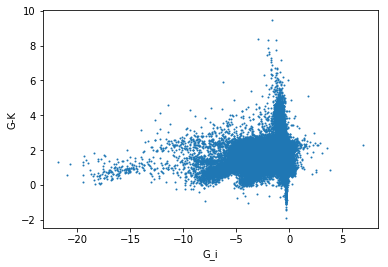

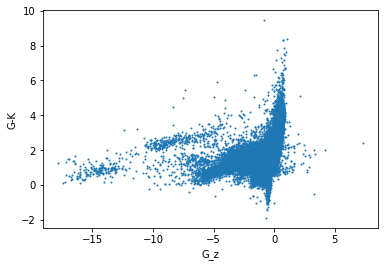

In [30]:
G_u = Gmags - umags
plt.scatter(G_u,G_K,s=1)
plt.xlabel('G_u')
plt.ylabel('G-K')
plt.show()

G_g = Gmags - gmags
plt.scatter(G_g,G_K,s=1)
plt.xlabel('G_g')
plt.ylabel('G-K')
plt.show()

G_r = Gmags - rmags
plt.scatter(G_r,G_K,s=1)
plt.xlabel('G_r')
plt.ylabel('G-K')
plt.show()

G_i = Gmags - imags
plt.scatter(G_i,G_K,s=1)
plt.xlabel('G_i')
plt.ylabel('G-K')
plt.show()

G_z = Gmags - zmags
plt.scatter(G_z,G_K,s=1)
plt.xlabel('G_z')
plt.ylabel('G-K')
plt.show()

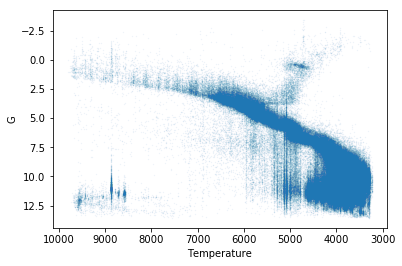

In [47]:
Temp = t['teff_val'].values

plt.scatter(Temp,Gmags,s=.1,alpha = 0.1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature')
plt.ylabel('G')
plt.show()

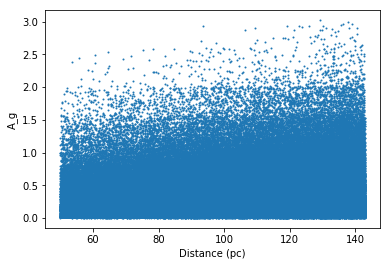

In [13]:
Ag = t["a_g_val"].values
plt.scatter(Dist,Ag,s=1)
plt.xlabel('Distance (pc)')
plt.ylabel('A_g')
plt.show()

In [55]:
#limit the magnitudes to <17
Bmags2 = np.ma.MaskedArray(Bmags, mask=(np.ones_like(Bmags)*(Bmags[:]>=8)))
Vmags2 = np.ma.MaskedArray(Gmags, mask=(np.ones_like(Gmags)*(Gmags[:]>=8)))
Gmags2 = np.ma.MaskedArray(Gmags, mask=(np.ones_like(Gmags)*(Gmags[:]>=8)))
Jmags2 = np.ma.MaskedArray(Jmags, mask=(np.ones_like(Jmags)*(Gmags[:]>=8)))
Hmags2 = np.ma.MaskedArray(Hmags, mask=(np.ones_like(Hmags)*(Gmags[:]>=8)))
Kmags2 = np.ma.MaskedArray(Kmags, mask=(np.ones_like(Kmags)*(Gmags[:]>=8)))
umags2 = np.ma.MaskedArray(umags, mask=(np.ones_like(umags)*(Gmags[:]>=8)))
gmags2 = np.ma.MaskedArray(gmags, mask=(np.ones_like(gmags)*(Gmags[:]>=8)))
rmags2 = np.ma.MaskedArray(rmags, mask=(np.ones_like(rmags)*(Gmags[:]>=8)))
imags2 = np.ma.MaskedArray(imags, mask=(np.ones_like(imags)*(Gmags[:]>=8)))
zmags2 = np.ma.MaskedArray(zmags, mask=(np.ones_like(zmags)*(Gmags[:]>=8)))


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


In [53]:
count = 0
for i in range(len(Gmags2)):
    if Hmags2.mask[i] == True:
        count = count+1
print(count)

1920975


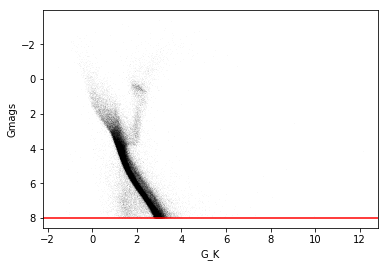

In [61]:
G_K2 = Gmags2-Kmags2
plt.scatter(G_K2,Gmags2,s=.01,alpha=0.1,color="black")
plt.axhline(y = 8,c='r')
plt.gca().invert_yaxis()
plt.xlabel('G_K')
plt.ylabel('Gmags')
plt.show()

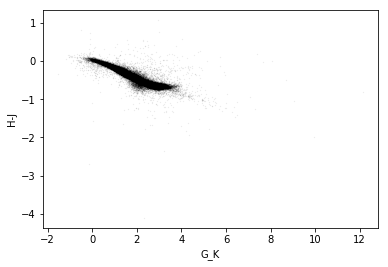

In [60]:
H_J2 = Hmags2-Jmags2
plt.scatter(G_K2,H_J2,s=.1,alpha=0.1,color="black")
plt.xlabel('G_K')
plt.ylabel('H-J')
plt.show()

# Templates

In [58]:
wvl = [358,420,475,477,620,769,966,1235,1662,2159]
wvl2 = [358,420,475,477,620,673,769,966,1235,1662,2159]
#colors = [0,0.5,1,1.5,2,2.5,3,3.5] 
colors = np.arange(-0.4,3.4,0.2)

color = ColorClassification(Gmags2,Kmags,colors)
stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err = \
CreateTemplates2(color,colors,Vmags2,Bmags2,Gmags2,Jmags2,Hmags2,Kmags2,umags2,gmags2,rmags2,imags2,zmags2)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:75: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


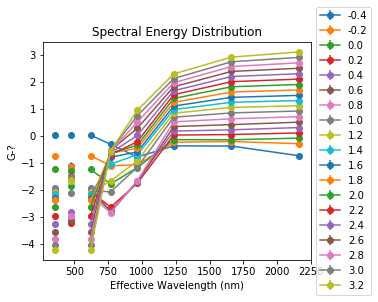

In [19]:
for i in range(len(color_mags)):
    color_mags[i,1] = np.NaN
    color_mags[i,3] = np.NaN

ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, color_mags[i,:], yerr = color_std_err[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

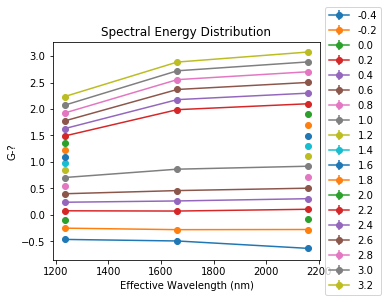

In [59]:
for i in range(len(color_mags)):
    color_mags[i,1] = np.NaN
    color_mags[i,3] = np.NaN

ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, color_mags[i,:], yerr = color_std_err[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('G-?')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()